<a href="https://colab.research.google.com/github/TaNuNian/Basicpython_ESANTH/blob/main/DS101_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sale.csv")
df

,Month,nettotal
0,1,3009016.00
1,2,2376864.75
2,3,2924941.75
3,4,3326001.50
4,5,3203833.25
5,6,3480414.25
6,7,3998366.25
7,8,4137545.00
8,9,3991190.75
9,10,4195646.50


<Axes: xlabel='Month', ylabel='nettotal'>

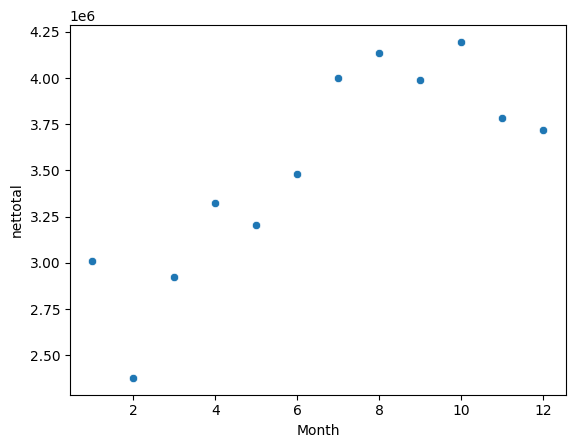

In [ ]:
sns.scatterplot(data=df, x="Month", y="nettotal")

In [ ]:
#เรียก libarary scikit-learn
from sklearn.linear_model import LinearRegression
x = df.Month.values.reshape(-1,1)
y = df.nettotal
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [ ]:
y_predict = model.predict(x)
y_predict

array([2819981.625     , 2945806.61363636, 3071631.60227273,
       3197456.59090909, 3323281.57954545, 3449106.56818182,
       3574931.55681818, 3700756.54545455, 3826581.53409091,
       3952406.52272727, 4078231.51136364, 4204056.5       ])

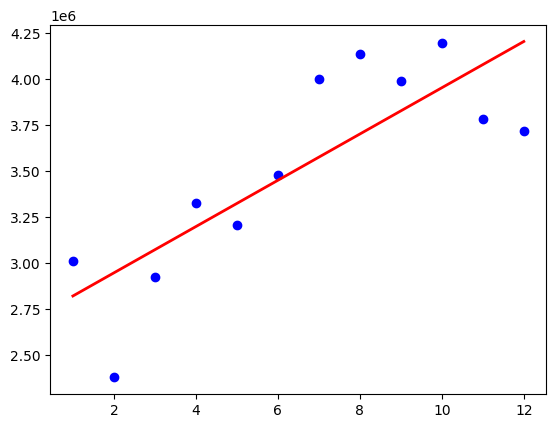

In [ ]:
plt.scatter(x, y, color='b')
#plt.plot(x, y, linewidth='2', color='b')
plt.plot(x, y_predict, linewidth='2', color='r')
plt.show()

In [ ]:
df

,Month,nettotal
0,1,3009016.00
1,2,2376864.75
2,3,2924941.75
3,4,3326001.50
4,5,3203833.25
5,6,3480414.25
6,7,3998366.25
7,8,4137545.00
8,9,3991190.75
9,10,4195646.50


In [ ]:
df["predict"] = y_predict
df

,Month,nettotal,predict
0,1,3009016.00,2.819982e+06
1,2,2376864.75,2.945807e+06
2,3,2924941.75,3.071632e+06
3,4,3326001.50,3.197457e+06
4,5,3203833.25,3.323282e+06
5,6,3480414.25,3.449107e+06
6,7,3998366.25,3.574932e+06
7,8,4137545.00,3.700757e+06
8,9,3991190.75,3.826582e+06
9,10,4195646.50,3.952407e+06


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print(model.score(x,y))
print(mean_squared_error(y, y_predict))
print(mean_absolute_error(y, y_predict))

0.654833631905012
99445717950.96852
269493.2178030303


In [ ]:
model.coef_

array([125824.98863636])

In [ ]:
model.intercept_

2694156.6363636367

In [ ]:
y_predict_Future = model.predict([[1],[2]])
print(y_predict_Future)

[2819981.625      2945806.61363636]


In [ ]:
d_unseen = {'Month': [13,14], 'nettotal': [0,0]}
df_unseen = pd.DataFrame(data=d_unseen)
df_unseen["predict"] = y_predict_Future
df_unseen

,Month,nettotal,predict
0,13,0,2.819982e+06
1,14,0,2.945807e+06


In [ ]:
mergedata = pd.concat([df,df_unseen], axis=0)
mergedata

,Month,nettotal,predict
0,1,3009016.00,2.819982e+06
1,2,2376864.75,2.945807e+06
2,3,2924941.75,3.071632e+06
3,4,3326001.50,3.197457e+06
4,5,3203833.25,3.323282e+06
5,6,3480414.25,3.449107e+06
6,7,3998366.25,3.574932e+06
7,8,4137545.00,3.700757e+06
8,9,3991190.75,3.826582e+06
9,10,4195646.50,3.952407e+06


In [ ]:
mergedata.to_csv('/content/sale2_output.csv', index=False)